**LINEAR REGRESSION BUILDING FROM SCRATCH**

In [3]:
import numpy as np

In [35]:
class Linear_Regression():

#Initiating the parameters (learning rate & no_of_iterations)
  def __init__(self,learning_rate,no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations



  def fit(self,X,Y):

    #number of training examples & number of features
    self.m, self.n = X.shape

    #Inittiating the weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    #Implementing gradient descent
    for i in range(self.no_of_iterations):
      self.update_weight()

  def update_weight(self):

    Y_pred = self.predict(self.X)

    #Calculate Gradient
    dw=-(2 * (self.X.T).dot(self.Y - Y_pred))/self.m
    db=-2 * np.sum(self.Y - Y_pred)/self.m

    #Update weights
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db


  def predict(self,X):
    return np.dot(X,self.w) + self.b # Y=wX+b -> y=mx+c

Implementing Linear Regression

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Preprocessing

In [7]:
df=pd.read_csv('/content/salary_data.csv')

In [8]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [9]:
df.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [10]:
print(df.shape)

(30, 2)


In [11]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [17]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [43]:
model=Linear_Regression(learning_rate=0.01,no_of_iterations=1000)


In [44]:
model.fit(X_train,Y_train)

In [45]:
# printing the parameter values ( weights & bias)

print('weight = ', model.w[0])
print('bias = ', model.b)


weight =  9419.100814565125
bias =  26413.71508149363


In [46]:
test_data_prediction = model.predict(X_test)


In [48]:
print(test_data_prediction)


[ 40542.36630334 123430.45347151  65032.02842121  63148.2082583
 115895.17281986 108359.89216821 116837.08290132  64090.11833975
  76334.94939869]


Visualizing the data

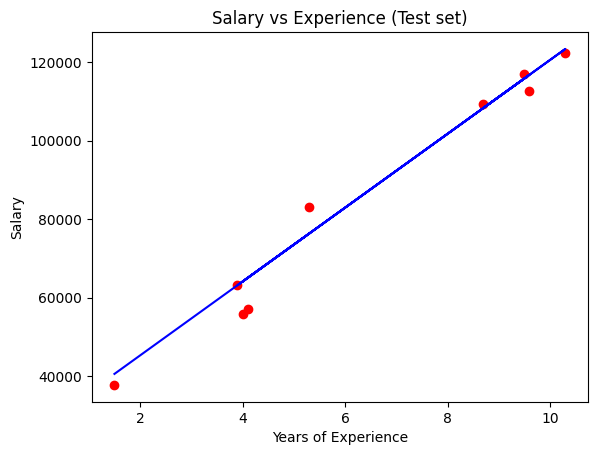

In [47]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()